# Primeros pasos :
Haremos los ejercicios dejados en el curso :

In [2]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
    """Create and compile a simple linear regression model."""
    # Most simple tf.keras models are sequential.
    # A sequential model contains one or more layers.
    model = tf.keras.models.Sequential()

    # Describe the topography of the model.
    # The topography of a simple linear regression model
    # is a single node in a single layer.
    model.add(tf.keras.layers.Dense(units=1,
                                    input_shape=(1,)))

    # Compile the model topography into code that
    # TensorFlow can efficiently execute. Configure
    # training to minimize the model's mean squared error.
    model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=my_learning_rate),
                  loss="mean_squared_error",
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])

    return model


def train_model(model, feature, label, epochs, batch_size):
    """Train the model by feeding it data."""

    # Feed the feature values and the label values to the
    # model. The model will train for the specified number
    # of epochs, gradually learning how the feature values
    # relate to the label values.
    history = model.fit(x=feature,
                        y=label,
                        batch_size=batch_size,
                        epochs=epochs)

    # Gather the trained model's weight and bias.
    trained_weight = model.get_weights()[0]
    trained_bias = model.get_weights()[1]

    # The list of epochs is stored separately from the
    # rest of history.
    epochs = history.epoch

    # Gather the history (a snapshot) of each epoch.
    hist = pd.DataFrame(history.history)

    # Specifically gather the model's root mean
    # squared error at each epoch.
    rmse = hist["root_mean_squared_error"]

    return trained_weight, trained_bias, epochs, rmse

print("Defined build_model and train_model")
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
    """Plot the trained model against the training feature and label."""

    # Label the axes.
    plt.xlabel("feature")
    plt.ylabel("label")

    # Plot the feature values vs. label values.
    plt.scatter(feature, label)

    # Create a red line representing the model. The red line starts
    # at coordinates (x0, y0) and ends at coordinates (x1, y1).
    x0 = 0
    y0 = trained_bias
    x1 = feature[-1]
    y1 = trained_bias + (trained_weight * x1)
    plt.plot([x0, x1], [y0, y1[0]],  c='r')

    # Render the scatter plot and the red line.
    plt.show()

def plot_the_loss_curve(epochs, rmse):
    """Plot the loss curve, which shows loss vs. epoch."""

    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Root Mean Squared Error")

    plt.plot(epochs, rmse, label="Loss")
    plt.legend()
    plt.ylim([rmse.min()*0.97, rmse.max()])
    plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined build_model and train_model
Defined the plot_the_model and plot_the_loss_curve functions.


Resumiendo el codigo , genera un modelo con una neurona con la libreria tensorflow , para poder generar una regresion lineal ,y tambien plotea los puntos a tratar y la recta predicha .Debajo de esto estarian los datos que aplicariamos a la regresion .

Epoch 1/10
1/1 [==============================] - 0s 266ms/step - loss: 393.3993 - root_mean_squared_error: 19.8343
Epoch 2/10
1/1 [==============================] - 0s 7ms/step - loss: 383.1222 - root_mean_squared_error: 19.5735
Epoch 3/10
1/1 [==============================] - 0s 10ms/step - loss: 375.7979 - root_mean_squared_error: 19.3855
Epoch 4/10
1/1 [==============================] - 0s 6ms/step - loss: 369.7428 - root_mean_squared_error: 19.2287
Epoch 5/10
1/1 [==============================] - 0s 6ms/step - loss: 364.4243 - root_mean_squared_error: 19.0899
Epoch 6/10
1/1 [==============================] - 0s 4ms/step - loss: 359.5958 - root_mean_squared_error: 18.9630
Epoch 7/10
1/1 [==============================] - 0s 7ms/step - loss: 355.1202 - root_mean_squared_error: 18.8446
Epoch 8/10
1/1 [==============================] - 0s 6ms/step - loss: 350.9121 - root_mean_squared_error: 18.7326
Epoch 9/10
1/1 [==============================] - 0s 5ms/step - loss: 346.9147 - root

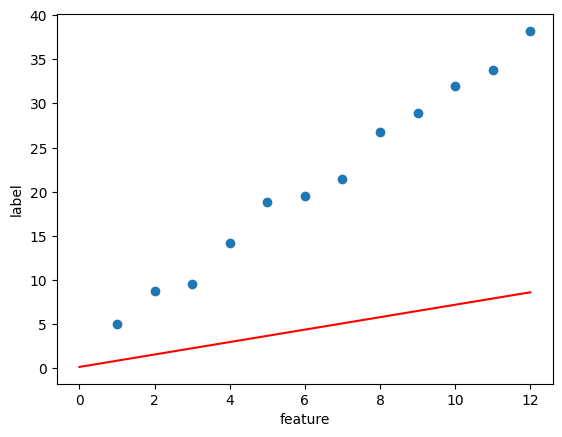

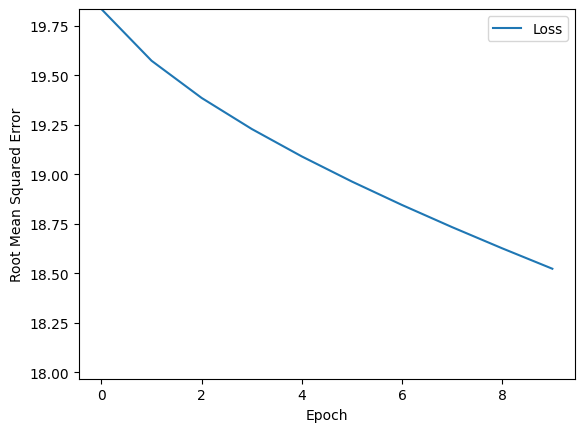

In [3]:
my_feature = np.array([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = np.array([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])
learning_rate=0.01
epochs=10
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

## Ejercicio 1 :
Examine el gráfico superior. Los puntos azules identifican los datos reales; La línea roja identifica la salida del modelo entrenado. Idealmente, la línea roja debe alinearse bien con los puntos azules. ¿Lo hace? Probablemente no.

Una cierta cantidad de aleatoriedad juega en el entrenamiento de un modelo, por lo que obtendrá resultados algo diferentes cada vez que entrene. Dicho esto, a menos que seas una persona extremadamente afortunada, la línea roja probablemente no se alinee bien con los puntos azules.

Examine el gráfico inferior, que muestra la curva de pérdida. Observe que la curva de pérdida disminuye pero no se aplana, lo cual es una señal de que el modelo no se ha entrenado lo suficiente.

* Respuesta : Si ejecutamos el programa tal cual nos lo dan , este no llegaria a tener una prediccion correcta y la recta generada se alejaria a los datos entregados


## Ejercicio 2 :
La pérdida de entrenamiento debe disminuir constantemente, abruptamente al principio, y luego más lentamente. Eventualmente, la pérdida de entrenamiento debe mantenerse estable (pendiente cero o pendiente casi cero), lo que indica que el entrenamiento ha convergido.

En la Tarea 1, la pérdida de entrenamiento no convergió. Una posible solución es entrenar para más épocas. Su tarea es aumentar el número de épocas lo suficiente como para que el modelo converja. Sin embargo, es ineficiente entrenar la convergencia pasada, así que no solo establezca el número de épocas en un valor arbitrariamente alto.

Examine la curva de pérdida. ¿Converge el modelo?

* Respuesta : Al poner numeros un poco altos al inicial ,como 100 o 200 no se llega a la convergencia del modelo , pero si se aumenta hasta un aproximado de 450 - 500 epochs llega a converger el modelo

Epoch 1/400
1/1 [==============================] - 0s 309ms/step - loss: 206.6036 - root_mean_squared_error: 14.3737
Epoch 2/400
1/1 [==============================] - 0s 8ms/step - loss: 199.1829 - root_mean_squared_error: 14.1132
Epoch 3/400
1/1 [==============================] - 0s 9ms/step - loss: 193.9307 - root_mean_squared_error: 13.9259
Epoch 4/400
1/1 [==============================] - 0s 6ms/step - loss: 189.6102 - root_mean_squared_error: 13.7699
Epoch 5/400
1/1 [==============================] - 0s 6ms/step - loss: 185.8311 - root_mean_squared_error: 13.6320
Epoch 6/400
1/1 [==============================] - 0s 6ms/step - loss: 182.4129 - root_mean_squared_error: 13.5060
Epoch 7/400
1/1 [==============================] - 0s 7ms/step - loss: 179.2553 - root_mean_squared_error: 13.3886
Epoch 8/400
1/1 [==============================] - 0s 7ms/step - loss: 176.2961 - root_mean_squared_error: 13.2777
Epoch 9/400
1/1 [==============================] - 0s 6ms/step - loss: 173.493

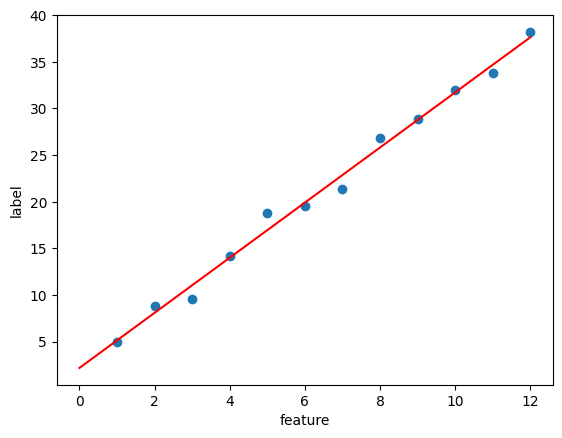

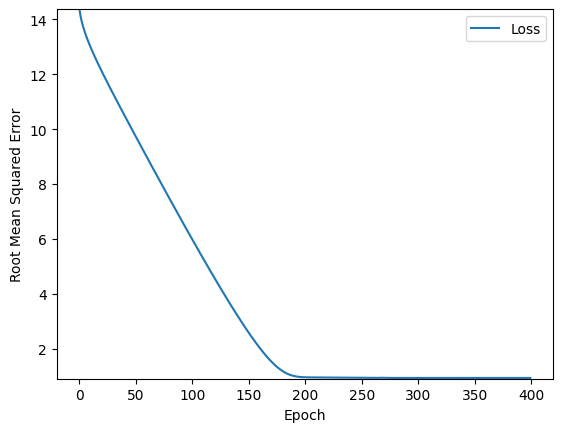

In [7]:
my_feature = np.array([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = np.array([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])
learning_rate=0.01
epochs=400
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

## Ejercicio 3 :
En la tarea 2, aumentó el número de épocas para que el modelo converja. A veces, puede hacer que el modelo converja más rápidamente aumentando la tasa de aprendizaje. Sin embargo, establecer la tasa de aprendizaje demasiado alta a menudo hace imposible que un modelo converja. En la Tarea 3, hemos establecido intencionalmente la tasa de aprendizaje demasiado alta. Ejecute la siguiente celda de código y vea qué sucede.

* Respuesta : Con esa taza de aprendizaje y con esa cantidad de epochs no llega a converger el modelo

Epoch 1/500
1/1 [==============================] - 0s 308ms/step - loss: 546.9716 - root_mean_squared_error: 23.3874
Epoch 2/500
1/1 [==============================] - 0s 6ms/step - loss: 6695199.5000 - root_mean_squared_error: 2587.5083
Epoch 3/500
1/1 [==============================] - 0s 10ms/step - loss: 542.4976 - root_mean_squared_error: 23.2916
Epoch 4/500
1/1 [==============================] - 0s 11ms/step - loss: 3.1484 - root_mean_squared_error: 1.7744
Epoch 5/500
1/1 [==============================] - 0s 7ms/step - loss: 0.9901 - root_mean_squared_error: 0.9950
Epoch 6/500
1/1 [==============================] - 0s 10ms/step - loss: 0.9540 - root_mean_squared_error: 0.9767
Epoch 7/500
1/1 [==============================] - 0s 7ms/step - loss: 0.9480 - root_mean_squared_error: 0.9737
Epoch 8/500
1/1 [==============================] - 0s 7ms/step - loss: 0.9431 - root_mean_squared_error: 0.9711
Epoch 9/500
1/1 [==============================] - 0s 10ms/step - loss: 0.9382 - roo

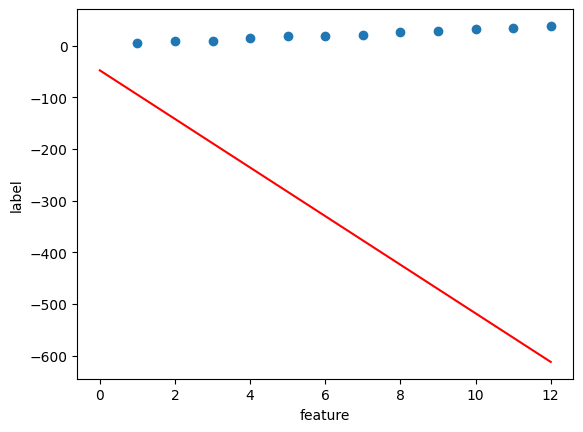

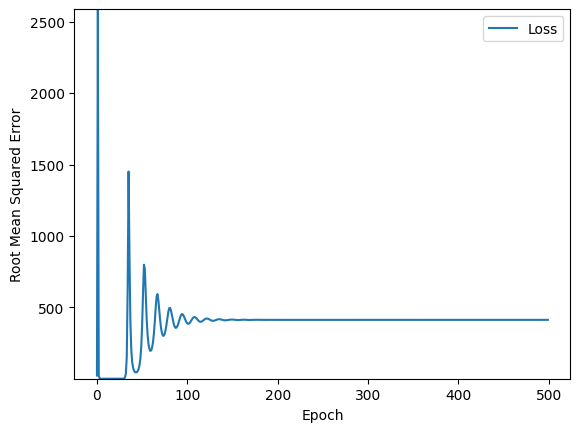

In [8]:
my_feature = np.array([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = np.array([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])
learning_rate=100
epochs=500
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)